내가 해볼거:

1. 쿠폰 타이틀에 따른 쿠폰 할인액
2. 판매금액과 실제금액 차이에 따른 실질적인 강의 판매액 ( 패캠에서 타겟하는)
3. 강의 판매량에 따른 금액 변동 추이가 발생하는가
4.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
import matplotlib.font_manager as fm


pd.options.display.max_columns = 200
pd.options.display.max_info_columns =200


In [3]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [4]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Mini_project_0509~0520/파이널프로젝트_RAW_210329_210926.xlsx")

In [5]:
df


,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,110500.0,110500.0,NaN,VBANK,개발자 커리어,NaT
1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
3,970656,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,NaN,NaN,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105414,1364995,640697.0,205365.0,PAYMENT,CANCELLED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:10:42,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,116000.0,INICIS,TRANS,영상 편집,2021-06-15
105415,1364998,670896.0,204159.0,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:16:33,189000,NaN,NaN,189000.0,189000.0,INICIS,CARD,부동산 개발,2021-02-10
105416,1364996,640697.0,205365.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,116000.0,INICIS,VBANK,영상 편집,2021-06-15
105417,1365005,670896.0,204159.0,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:19:56,189000,NaN,NaN,189000.0,189000.0,INICIS,CARD,부동산 개발,2021-02-10


In [6]:
cp = df[ ( df['state']=='COMPLETED') & (df['type']=='PAYMENT')] #cp 데이터프레임으로 변환
# df = df[df['type']=='PAYMENT']
ref = df[df['type']=='REFUND']
ref

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
651,972377,444760.0,204122.0,REFUND,COMPLETED,퍼포먼스 마케터 되기 온라인 완주반 2기,마케팅,온라인 완주반,2021-03-29 09:24:43,-147000,NaN,NaN,404000.0,404000.0,NaN,VBANK,NaN,NaT
652,972381,472666.0,203178.0,REFUND,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-29 09:26:13,-96000,NaN,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02
666,972409,447177.0,203989.0,REFUND,COMPLETED,올인원 패키지 : 소금툰과 함께 캐릭터 드로잉/굿즈/임티/컷툰,디자인,올인원,2021-03-29 09:40:54,-79000,NaN,NaN,89000.0,89000.0,NaN,CARD,일러스트,2021-02-19
672,972422,373915.0,204264.0,REFUND,COMPLETED,데이터분석 프로젝트+자격증 온라인 완주반 3기,데이터사이언스,온라인 완주반,2021-03-29 09:44:01,-340000,NaN,NaN,340000.0,340000.0,NaN,VBANK,NaN,2021-03-08
675,972436,456086.0,NaN,REFUND,COMPLETED,프로모션 :연봉 앞자리가 바뀌는 프론트엔드 한끝세트 (3월 프리패스),프로그래밍,올인원,2021-03-29 09:47:17,-299000,NaN,NaN,299000.0,299000.0,NaN,CARD,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105169,1363708,600073.0,206065.0,REFUND,COMPLETED,(프로모션 7/16-7/29) 초격차 패키지 : 한 번에 끝내는 Spring 완.전.판,프로그래밍,올인원,2021-09-24 14:34:50,-149000,NaN,NaN,179000.0,179000.0,NAVER,CARD,백엔드 개발,2021-07-15
105175,1363721,645911.0,NaN,REFUND,COMPLETED,프로모션 : 콘텐츠 마케터 맥북 air 패스(9월 현물 프리패스),마케팅,올인원,2021-09-24 14:41:35,-1400000,NaN,NaN,1400000.0,251600.0,INICIS,CARD,NaN,NaT
105205,1363934,506356.0,206720.0,REFUND,COMPLETED,용호수의 돈 버는 실전 영상 제작,영상/3D,올인원,2021-09-24 16:10:55,-259000,NaN,NaN,259000.0,259000.0,NAVER,CARD,영상 편집,2021-08-17
105245,1364149,604077.0,205569.0,REFUND,COMPLETED,올인원 패키지 : 공여사와 무작정 풀어보는 엑셀 실무,업무 생산성,올인원,2021-09-24 17:09:30,-109000,NaN,NaN,129000.0,129000.0,KAKAO,POINT,엑셀/VBA,2021-08-17


In [7]:
cp

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14
8,970669,478033.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02
10,970671,469860.0,203644.0,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,263000,NaN,NaN,263000.0,263000.0,NaN,CARD,NaN,2020-11-27
14,970676,478035.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,111000.0,NaN,CARD,프론트엔드 개발,2021-02-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105411,1364969,669238.0,204286.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 3D 디자인 툴,디자인,올인원,2021-09-25 13:39:26,212000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.0,232000.0,232000.0,INICIS,CARD,디자인툴,2021-04-23
105412,1364976,384003.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-09-25 13:46:29,149000,NaN,NaN,149000.0,149000.0,KAKAO,CARD,영상 편집,2020-12-02
105413,1364991,670891.0,203935.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 파이썬 웹 개발,프로그래밍,올인원,2021-09-25 14:01:26,159000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.0,179000.0,179000.0,INICIS,CARD,백엔드 개발,2021-05-31
105416,1364996,640697.0,205365.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,116000.0,INICIS,VBANK,영상 편집,2021-06-15


In [8]:
del cp['tax_free_amount']
cp['coupon_title'].fillna('사용안함', inplace=True)
cp['coupon_discount_amount'].fillna(0.0,inplace=True)
cp['pg'].fillna('ETC', inplace=True)
cp.drop(index=47361, axis=0, inplace=True)
cp['subcategory_title'].fillna('해당없음', inplace=True)
cp['course_id'].replace('', np.nan, inplace=True)
cp.dropna(subset=['course_id'], inplace=True)
cp['sale_price'].replace('', np.nan, inplace=True)
cp.dropna(subset=['sale_price'],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/l

In [9]:
cp.isna().sum()


id                           0
customer_id                  0
course_id                    0
type                         0
state                        0
course_title                 0
category_title               0
format                       0
completed_at                 0
transaction_amount           0
coupon_title                 0
coupon_discount_amount       0
sale_price                   0
pg                           0
method                       0
subcategory_title            0
marketing_start_at        6397
dtype: int64

In [10]:
ref.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
651,972377,444760.0,204122.0,REFUND,COMPLETED,퍼포먼스 마케터 되기 온라인 완주반 2기,마케팅,온라인 완주반,2021-03-29 09:24:43,-147000,NaN,NaN,404000.0,404000.0,NaN,VBANK,NaN,NaT
652,972381,472666.0,203178.0,REFUND,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-29 09:26:13,-96000,NaN,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02
666,972409,447177.0,203989.0,REFUND,COMPLETED,올인원 패키지 : 소금툰과 함께 캐릭터 드로잉/굿즈/임티/컷툰,디자인,올인원,2021-03-29 09:40:54,-79000,NaN,NaN,89000.0,89000.0,NaN,CARD,일러스트,2021-02-19
672,972422,373915.0,204264.0,REFUND,COMPLETED,데이터분석 프로젝트+자격증 온라인 완주반 3기,데이터사이언스,온라인 완주반,2021-03-29 09:44:01,-340000,NaN,NaN,340000.0,340000.0,NaN,VBANK,NaN,2021-03-08
675,972436,456086.0,NaN,REFUND,COMPLETED,프로모션 :연봉 앞자리가 바뀌는 프론트엔드 한끝세트 (3월 프리패스),프로그래밍,올인원,2021-03-29 09:47:17,-299000,NaN,NaN,299000.0,299000.0,NaN,CARD,NaN,NaT


In [11]:
cp[ cp['customer_id']==98685.0 ].value_counts()
# ref[ ( ref['customer_id']==98685.0 ) & (ref['type']=='REFUND' ) ] # 관리자로 추정
# ref [ref['customer_id']==98685.0]


id       customer_id  course_id  type     state      course_title                                              category_title  format  completed_at         transaction_amount  coupon_title                                             coupon_discount_amount  sale_price  pg      method     subcategory_title  marketing_start_at 
984635   98685.0      201998.0   PAYMENT  COMPLETED  올인원 패키지 : iOS 앱 개발                                        프로그래밍           올인원     2021-04-01 10:19:28  24800               수강생 50만명 돌파 기념 감사제 쿠폰                                    87200.0                 112000.0    ETC     CARD       모바일앱               2020-01-14 00:00:00    1
1322836  98685.0      202827.0   PAYMENT  COMPLETED  올인원 패키지 : 생존을 위한 IT 필수지식                                  프로그래밍           올인원     2021-08-31 23:58:25  130000              사용안함                                                     0.0                     130000.0    PAYCO   CARD       코딩 입문              2020-07-07 00:00:00    1
1305376  

#판매량

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


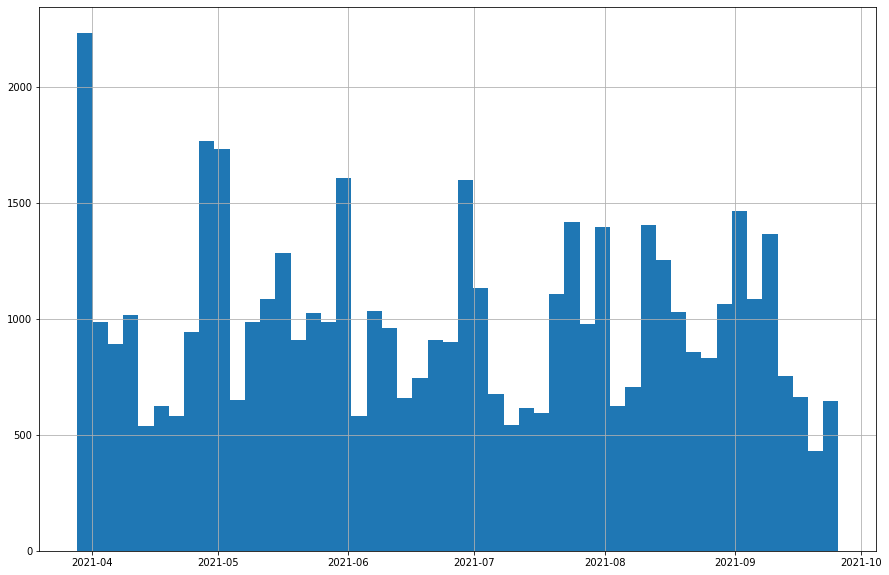

In [12]:
cp['completed_at'].hist(bins=50,figsize=(15,10))
#판매량은 21년 3월부터 감소 추세를 보임 -> 증가추이를 위해 어떤 마케팅 효과를 부여하면 좋을지 ( 콘텐츠 기획분석 측면)

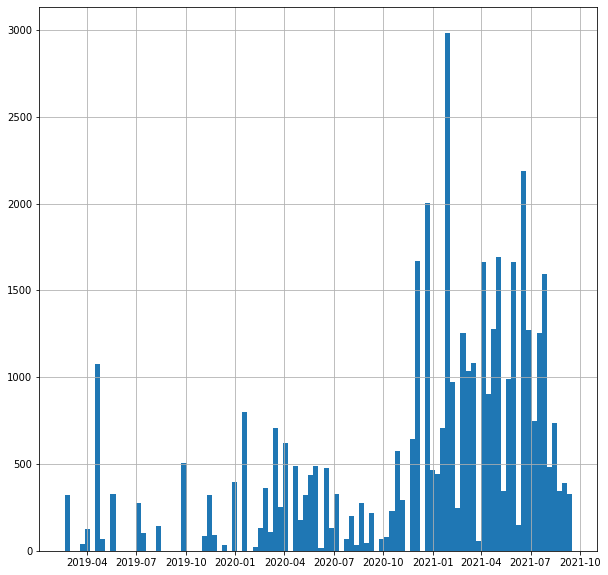

In [13]:
cp['marketing_start_at'].hist(bins=100,figsize=(10,10))
# 20년말부터 강의 개수가 폭발적으로 증가 - > 이에 대한 이유를 추론해봐도 좋을듯 -> 코로나로 인한 일자리 축소, 재택근무 등등
# 쿠폰 ->  

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46972 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50732 missing from current font.
  font.set_

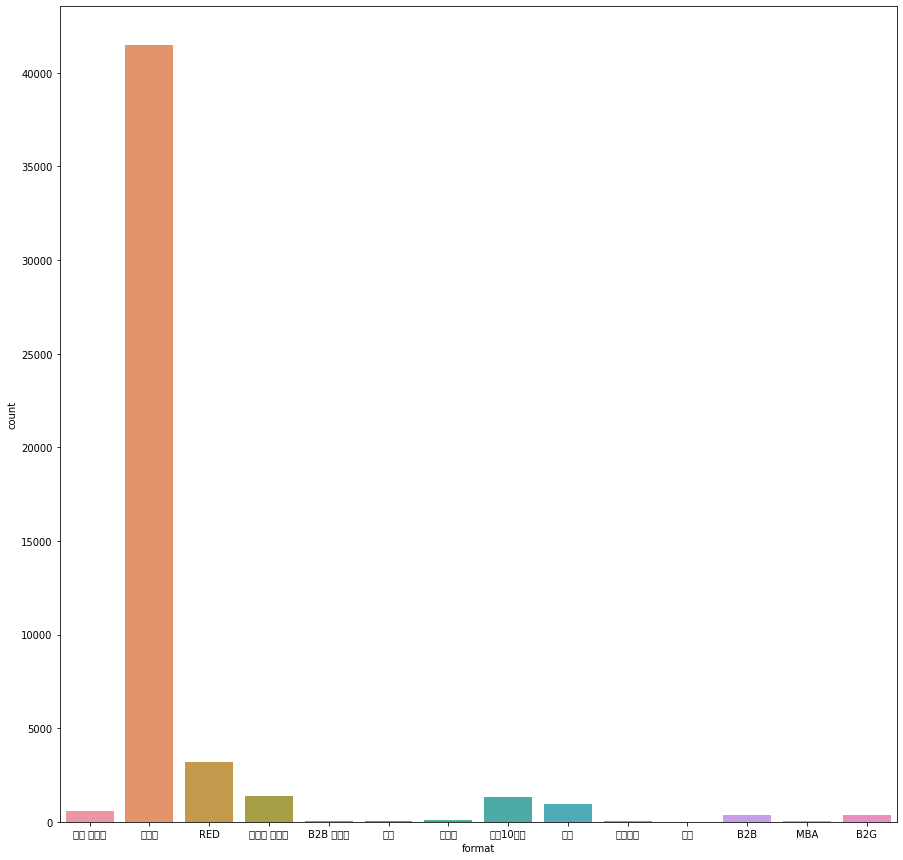

In [14]:
plt.figure(figsize=(15,15))
sns.countplot(data=cp,x='format')
plt.show()

##Sale Price

In [15]:
cp['sale_price'] = cp['sale_price'].astype(int)
cp['sale_price']
# df.reset_index(inplace=True)
# df['sale_price'].describe()
# df.head()
# df.sale_price.describe().astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


2         190900
4         117500
8         116000
10        263000
14        111000
           ...  
105411    232000
105412    149000
105413    179000
105416    116000
105418    169000
Name: sale_price, Length: 49854, dtype: int64

(array([3.1200e+03, 6.2100e+02, 5.6400e+02, 2.7220e+03, 8.3360e+03,
        1.0314e+04, 8.0050e+03, 7.9060e+03, 2.7500e+03, 1.2170e+03,
        6.9000e+02, 5.3100e+02, 4.3800e+02, 5.3800e+02, 7.1400e+02,
        2.4900e+02, 5.2000e+01, 3.2200e+02, 2.0400e+02, 3.0000e+01,
        1.8000e+01, 1.0000e+00, 3.9000e+01, 3.8000e+01, 2.6000e+01,
        6.4000e+01, 1.4800e+02, 5.2000e+01, 8.0000e+00, 6.4000e+01,
        3.9000e+01, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([     0.,  22500.,  45000.,  67500.,  90000., 112500., 135000.,
        157500., 180000., 202500., 225000., 247500., 270000., 292500.,
        315000., 337500., 360000., 382500., 405000., 427500., 450000.,
        472500., 495000., 517500., 540000., 562500., 585000., 607500.,
        630000., 652500., 675000., 697500., 720000., 742500., 765000.,
        787500., 810000., 832500., 855000., 877500., 900000.]),
 <a list of 40 Patch objects>)

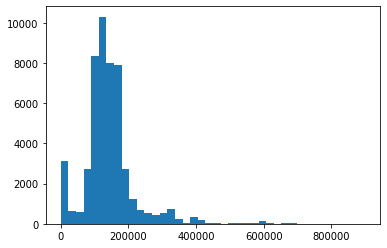

In [16]:
plt.hist(cp['sale_price'], range=(0,900000), bins=40)

(array([4.9826e+04, 2.2000e+01, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.00000000e+00, 1.11500098e+06, 2.23000095e+06, 3.34500093e+06,
        4.46000090e+06, 5.57500088e+06, 6.69000085e+06, 7.80500083e+06,
        8.92000080e+06, 1.00350008e+07, 1.11500008e+07, 1.22650007e+07,
        1.33800007e+07, 1.44950007e+07, 1.56100007e+07, 1.67250006e+07,
        1.78400006e+07, 1.89550006e+07, 2.00700006e+07, 2.11850005e+07,
        2.23000005e+07, 2.34150005e+07, 2.45300005e+07, 2.56450004e+07,
        2.67600004e+07

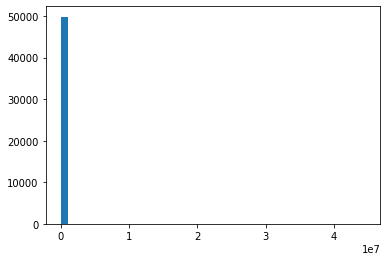

In [17]:
plt.hist(cp['sale_price'], bins=40)

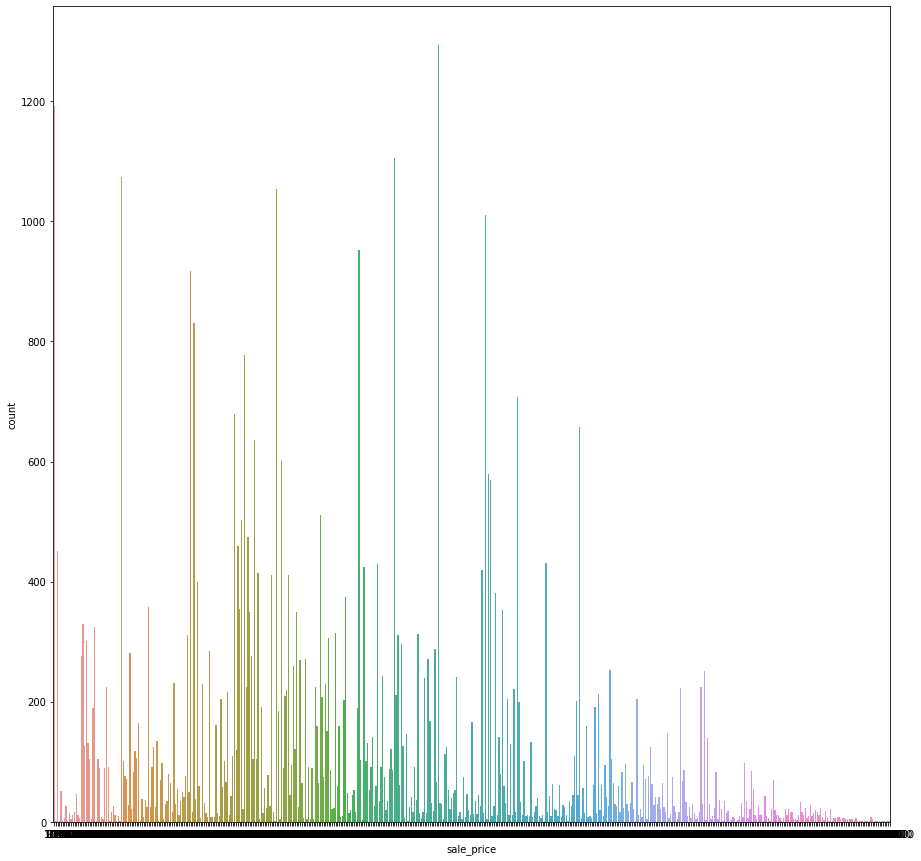

In [18]:
plt.figure(figsize=(15,15))
sns.countplot(data=cp,x='sale_price')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46972 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50732 missing from current font.
  font.set_

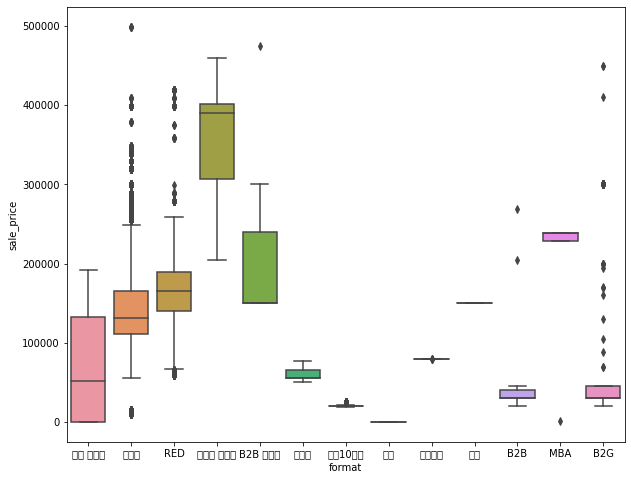

In [19]:
sc = cp[ (cp['sale_price'] < 500000 )& (['format'] ) ] # 50만원 미만

plt.figure(figsize=(10,8))
sns.boxplot(data=sc , x='format', y ='sale_price') 
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46972 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50732 missing from current font.
  font.set_

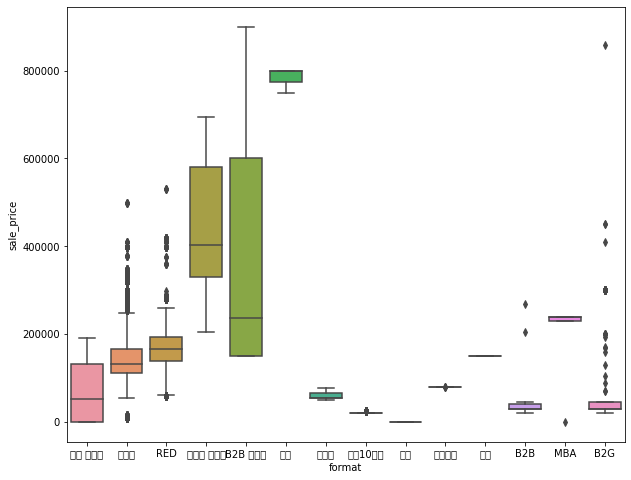

In [20]:
sc = cp[ (cp['sale_price'] < 1000000 )& (['format'] ) ] # 백만원 미만

plt.figure(figsize=(10,8))
sns.boxplot(data=sc , x='format', y ='sale_price') 
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46972 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50732 missing from current font.
  font.set_

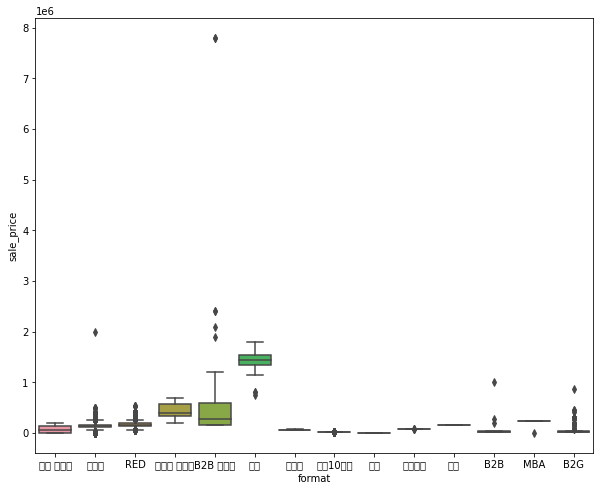

In [21]:
sc = cp[ (cp['sale_price'] < 10000000 )& (['format'] ) ] # 천만원 미만

plt.figure(figsize=(10,8))
sns.boxplot(data=sc , x='format', y ='sale_price') 
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47551 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54532 missing from current font.
  font.set_

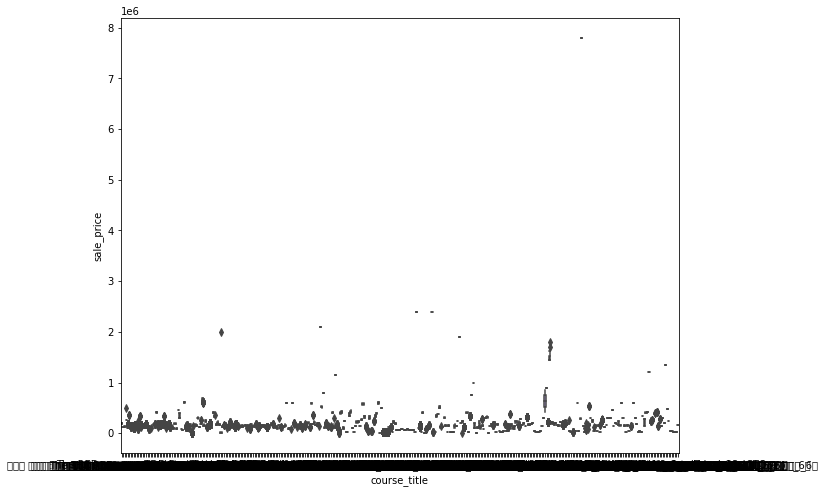

In [22]:
st = cp[ (cp['sale_price'] < 10000000 )& (['cours_title'] ) ] # 천만원 미만

plt.figure(figsize=(10,8))
sns.boxplot(data=st , x='course_title', y ='sale_price') 
plt.show()

In [23]:
cp[ cp['sale_price'] < 250000] ['course_title'].value_counts()


초격차 패키지 : 한 번에 끝내는 프론트엔드 개발                    1422
초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터         1416
초격차 패키지 : 한번에 끝내는 영상 촬영과 편집                    1216
The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법         1058
네카라쿠배 프론트엔드 취업완성 스쿨 2기_1차 테스트                   875
                                               ... 
올인원 패키지 : 1인 쇼핑몰 시작하기 (2020)                      1
(B2B) 42SEOUL 온라인 구독 올 플랜 (4월 2차)                 1
(TEST) 오프라인 과세 상품 결제 테스트용 상품                      1
스프링 아카데미아 강의 8 - Spring Security를 통한 MFA 구현       1
올인원 패키지 : Unity를 활용한 영화 애니메이션 제작                  1
Name: course_title, Length: 291, dtype: int64

In [24]:
cp[ cp['sale_price'] > 250000] ['course_title'].value_counts()

올인원 패키지 : 박세익 전무에게 배우는 주식 시장 분석 & 포트폴리오 운용 전략         507
올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초 (수강시간 제한)    242
올인원 패키지 : 15명의 전문 애널리스트에게 배우는 산업&매크로 분석과 투자 전략        224
올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 심화 (수강시간 제한)    216
초격차 패키지 : 한번에 끝내는 금융ㆍ투자(IB) 실무                        189
                                                     ... 
올인원 패키지 : 연봉도 배우면 바뀐다! 협상왕의 12가지 시스템 불패 전략              1
(B2B) 하나금융티아이 DT University(2021)                       1
(B2B) KB증권 블록체인 개발 입문 과정                                1
(B2B) 한남대학교 2021년 여름 추가학기 온라인 구독                        1
(B2B) 2021 하나카드 HDU 디지털 Biz 과정                          1
Name: course_title, Length: 91, dtype: int64

In [25]:
cp[ cp['sale_price'] > 550000] ['course_title'].value_counts()

매주)디지털 마케팅 온라인 완주반                                 145
매주)데이터 사이언스 온라인 완주반                                133
프론트엔드 개발자 되기 온라인 완주반 4기                             34
Java 웹 개발자 취업 온라인 완주반 3기                            29
프론트엔드 개발자 되기 온라인 완주반 3기                             18
Apache Spark을 이용한 빅데이터 분석 입문 15기                    15
Java 웹 개발자 취업 온라인 완주반 2기                             9
(B2B) 현대백화점 온라인 구독 올 플랜                              8
권오상 회계사의 자금조달 분석 및 가치평가                              2
부동산 금융 실무 : 엑셀을 활용한 부동산 사업성 분석 16기                   2
(B2B) (주)이지엠앤씨 온라인 구독 올 플랜                           2
(B2B) 주식회사 바로비즈 온라인 구독 올 플랜                          2
(B2B) 레이지소사이어티 온라인 구독 올 플랜                           1
(B2B) 리틀프렌즈 온라인 구독 올 플랜                              1
(B2B) 주식회사 핵심가치 온라인 구독 올 플랜                          1
(B2B) 하나금융티아이 DT University(2021)                    1
(B2B) KB증권 블록체인 개발 입문 과정                             1
파이썬을 활용한 전자공시 분석 자동화 8기                              1
(B2B) 지노텍 

In [26]:
cp[ cp['sale_price'] > 250000] ['course_title'].value_counts()
cp[ cp['sale_price'] > 350000] ['course_title'].value_counts()
cp[ cp['sale_price'] > 550000] ['course_title'].value_counts()
cp[ cp['sale_price'] > 5000000] ['course_title'].value_counts() # B2B사업이 돈이 됀다...

(B2B) (주)이지엠앤씨 온라인 구독 올 플랜           2
(B2B) KB증권 블록체인 개발 입문 과정             1
(B2B) 하나금융티아이 DT University(2021)    1
Name: course_title, dtype: int64

##Coupon

In [111]:
# 쿠폰 타이틀에 따른 쿠폰 할인액
cou = cp[ [ 'coupon_title','coupon_discount_amount']]
cou1 = cp[ [ 'coupon_title'] ] # 생각해보기 아다리 맞음
pd.DataFrame(cp[ [ 'coupon_title','coupon_discount_amount']].value_counts())

# cp[ cp['coupon_title'].str.contains('월') ]

pd.DataFrame( cou1[cou1['coupon_title'].str.contains('월')].value_counts()) # 쿠폰이름에서 월별 카운트 8월이 가장 많이 쿠폰을 뿌린것을 확인 가능
pd.DataFrame( cou[cou['coupon_title'].str.contains('월')].value_counts()) # 쿠폰 이름,할인액 카운트 # 월별 groupby하고 할인액 평균내고 싶은데 어떻게...? 

################################################################################################
#pd.DataFrame( cou[cou['coupon_title'].str.contains('월')].mean()) # 월 평균 128,625원 할인


0
coupon_title          coupon_discount_amount    
4월 1+1 페이백 이벤트 쿠폰     113000.0                66
                      92000.0                 54
5월 페이백 프로모션 쿠폰        100000.0                52
                      93500.0                 49
4월 1+1 페이백 이벤트 쿠폰     93000.0                 49
...                                           ..
8월 1+1 프로모션 쿠폰        65800.0                  1
                      66000.0                  1
                      66500.0                  1
                      71700.0                  1
[쿠폰재발급]8월 1+1 프로모션 쿠폰 99000.0                  1

[729 rows x 1 columns]

##Category

In [ ]:
cp['category_title'].value_counts()

프로그래밍       17146
업무 생산성       6442
데이터사이언스      6253
디자인          5706
영상/3D        5146
마케팅          4503
부동산/금융       2760
투자/재테크       1490
크리에이티브        321
교육             53
지식콘텐츠          23
데이터 사이언스        5
비즈니스            5
관리              1
Name: category_title, dtype: int64

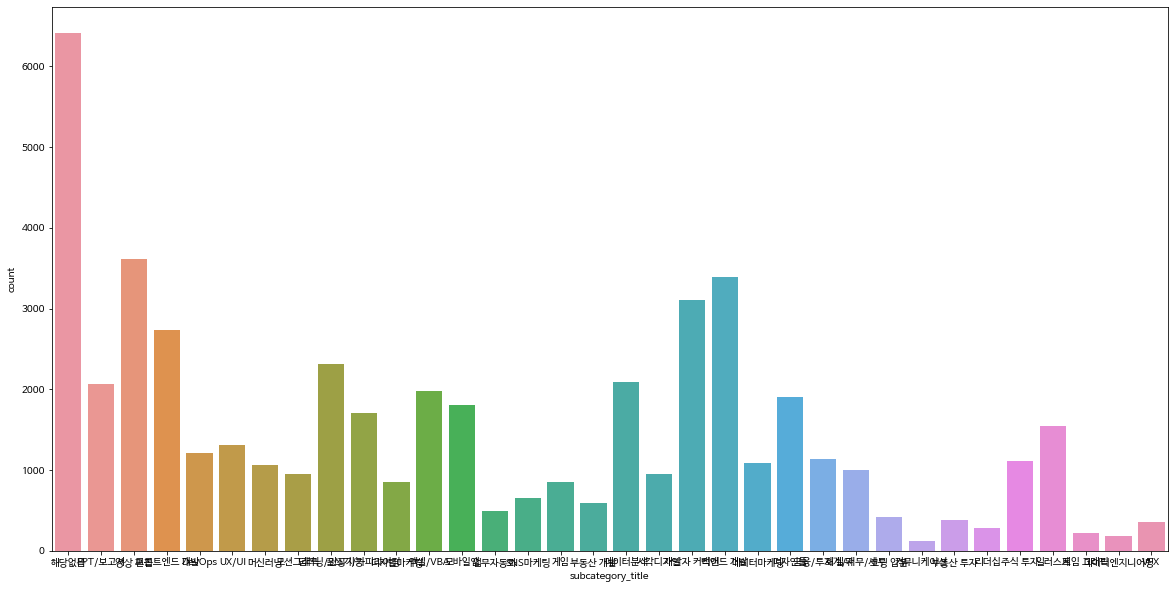

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(data=df,x='subcategory_title')
plt.show()

In [ ]:
 df['subcategory_title'].value_counts()

해당없음         6412
영상 편집        3620
백엔드 개발       3385
개발자 커리어      3104
프론트엔드 개발     2739
딥러닝/인공지능     2313
데이터분석        2096
PPT/보고서      2061
엑셀/VBA       1977
디자인툴         1900
모바일앱         1803
글쓰기/카피라이팅    1703
일러스트         1548
UX/UI        1308
DevOps       1210
금융/투자 실무     1133
주식 투자        1106
데이터마케팅       1090
머신러닝         1060
회계/재무/세무      998
모션그래픽         953
시각디자인         950
게임            856
디지털마케팅        850
SNS마케팅        652
부동산 개발        586
업무자동화         487
코딩 입문         418
부동산 투자        384
VFX           351
리더십           284
게임 그래픽        222
데이터엔지니어링      178
커뮤니케이션        117
Name: subcategory_title, dtype: int64